# Selfish Trajectory Optimization

In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import os
import sys
import numpy as np
from warnings import warn
sys.path.append(os.path.abspath('..'))
from cav_game.dynamics.car import BicycleDynamics
from cav_game.maneuvers.selfish import SelfishManeuver, SelfishManeuverRK4

### 1. Define Parameters

In [35]:

# Vehicle i initial conditions
x0 = 0       # Vehicle i initial x position [m]
v0 = 17      # Vehicle i initial velocity [m/s]
X0 = np.array([x0, v0])
# Obstacle i initial conditions
x0_obst = 20 # Obstacle i initial x position [m]
v0_obst = 16  # Obstacle i initial velocity [m/s]
X0_obst = np.array([x0_obst, v0_obst])
# Obstacle location descriptor
obstacles = {"front": X0_obst}
# Construct optimization parameters
maneuver_params = {"cav_type":"CAVC",
                   "n":301,
                   "display_solver_output": True,
                   "diff_method":'dae.finite_difference',
                   "alpha_control":0.1,
                   "alpha_time":0.1,
                   "alpha_speed":0.9}
# Construct vehicle model
veh_params = {}
cav_model = BicycleDynamics(veh_params)
# Construct maneuver
long_maneuver_continuous = SelfishManeuver(cav_model, x0 =  X0, x0_obst=obstacles, params = maneuver_params)
long_maneuver_discrete = SelfishManeuverRK4(cav_model, x0 =  X0, x0_obst=obstacles, params = maneuver_params)


### 3. Compute CAVC Trajectory

Ipopt 3.14.10: acceptable_obj_change_tol=1e-08
print_level=3
acceptable_tol=1e-08
max_iter=10000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:     2715
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      905
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2412
Total number of inequality constraints...............:      302
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
   

/Volumes/GoogleDrive-107698562618471631668/My Drive/PhD/Research/CODES/CAV-Game/cav_game/maneuvers/maneuver.py:211: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Ipopt 3.14.10: acceptable_obj_change_tol=1e-08
print_level=3
acceptable_tol=1e-08
max_iter=10000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:     1507
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      905
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1204
Total number of inequality constraints...............:      302
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
   

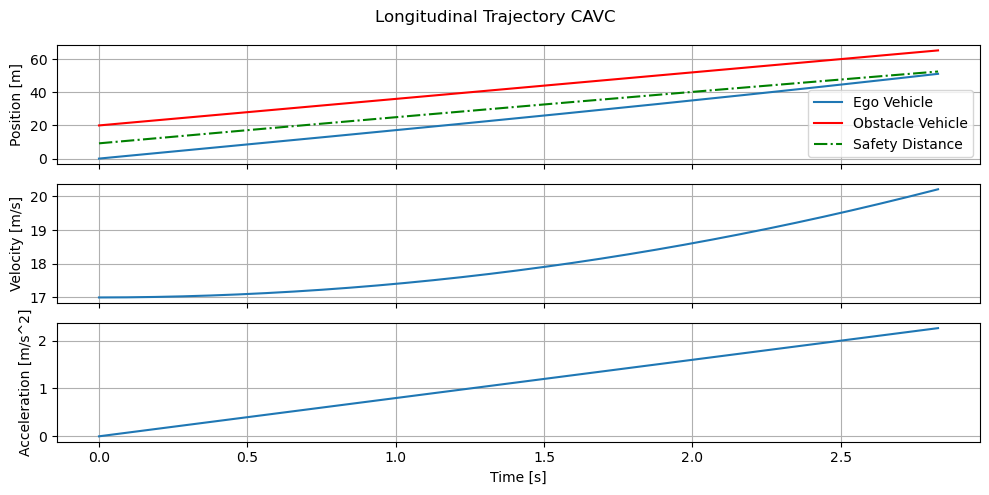

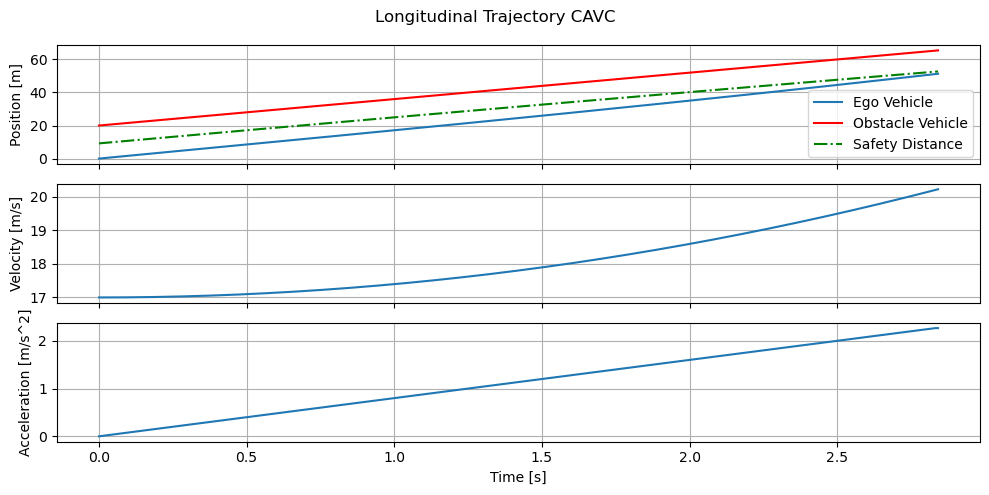

In [36]:
feasible, traj_cont = long_maneuver_continuous.compute_longitudinal_trajectory(obstacle=True)

if not feasible:
    warn("Trajectory Continuous is infeasible")

feasible, traj_disc = long_maneuver_discrete.compute_longitudinal_trajectory(obstacle=True)

if not feasible:
    warn("Trajectory Discrete is infeasible")

### 4. Relax Terminal Time and compute new trajectory

Ipopt 3.14.10: acceptable_obj_change_tol=1e-08
print_level=3
acceptable_tol=1e-08
max_iter=10000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:     2714
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      904
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2412
Total number of inequality constraints...............:      302
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
   

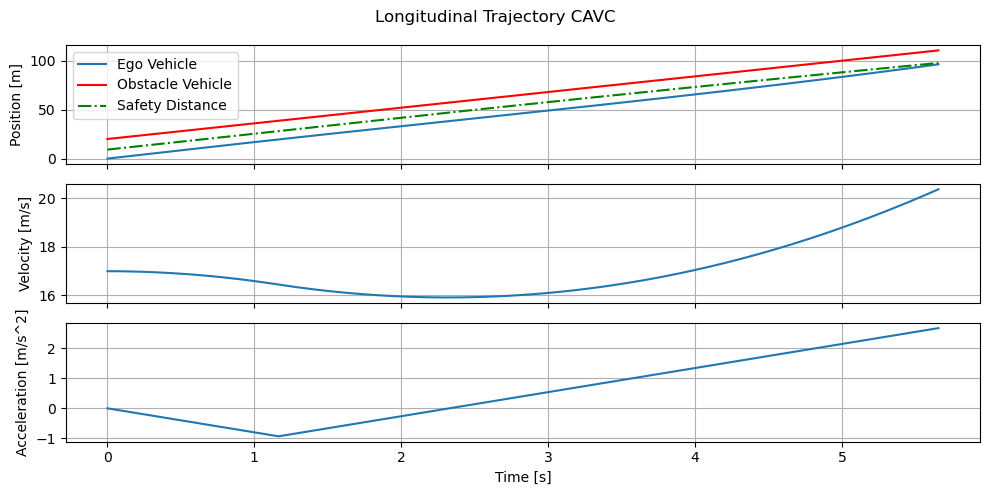

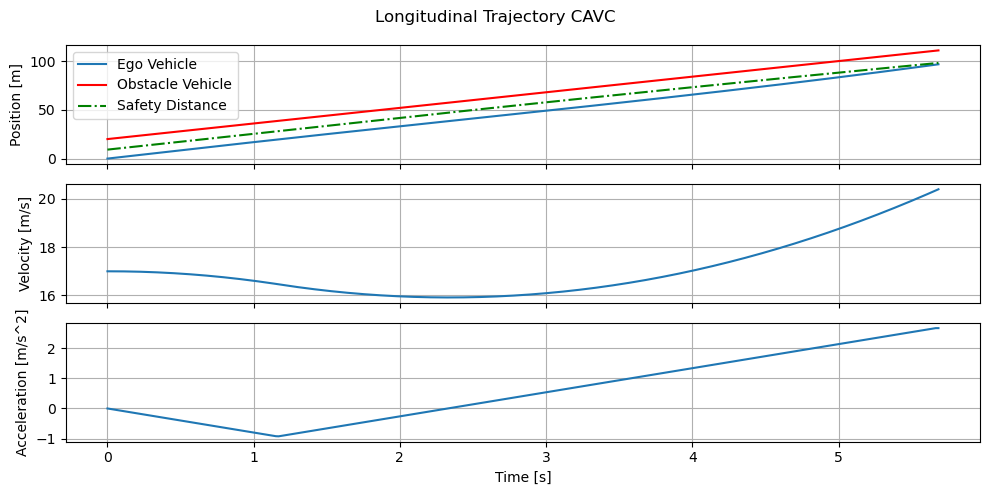

In [37]:
# Extract previous terminal time
tf = traj_cont['t'][-1]
feasible, traj = long_maneuver_continuous.relax_terminal_time(time=tf*2,obstacle=True)

if not feasible:
    warn("Trajectory is infeasible")

tf = traj_disc['t'][-1]
feasible, traj = long_maneuver_discrete.relax_terminal_time(time=tf*2,obstacle=True)

if not feasible:
    warn("Trajectory is infeasible")